In [9]:
import numpy as np 

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

Método de Euler 

Es un método de Diferencias Finitas para encontrar una solución de una ecuación diferencial ordinaria.

$$y´=f(x , y)$$

In [22]:
def euler_step(x, v, t, dt, force_func, m):
    a = force_func(x, t) / m  # Corrected function name
    x_next = x + dt * v       # Added missing '+' operator
    v_next = v + dt * a
    return x_next, v_next

def euler_solver(x0, v0, t0, tf, dt, force_func, m):  # Changed t1 to tf for consistency
    N = int((tf - t0) / dt)
    t_vals = np.linspace(t0, tf, N + 1)
    x_vals = np.zeros(N + 1)
    v_vals = np.zeros(N + 1)

    x, v = x0, v0  # Fixed indentation
    for i in range(N + 1):
        x_vals[i] = x
        v_vals[i] = v
        x, v = euler_step(x, v, t_vals[i], dt, force_func, m)
    
    return t_vals, x_vals, v_vals  # Removed duplicate return statement
# Gráfica

def graficar(t, x, v, titulo):
    plt.figure(figsize=(10, 4))
    plt.plot(t, x, label='x(t)')
    plt.plot(t, v, label='v(t)')
    plt.title(titulo)
    plt.xlabel('Tiempo')
    plt.ylabel('Valor')
    plt.grid(True)
    plt.legend()
    plt.show()

    

In [18]:
def force_func(x, t):
    return 0

def force_constant(x, t, c = 1): 
    return c

def force_spring(x, t, k = 1):
    return -k * x

In [19]:

# parameters 
x0, v0 = 0 , 1
t0, tf = 0, 10
dt = 0.01
m = 1

# solve 
t, x, v = euler_solver(x0, v0, t0, tf, dt, force_func, m)

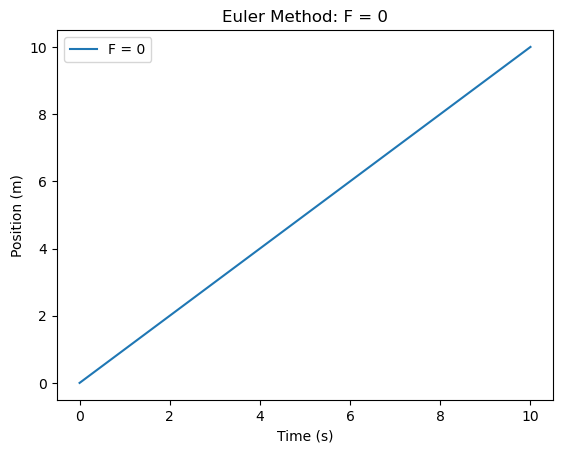

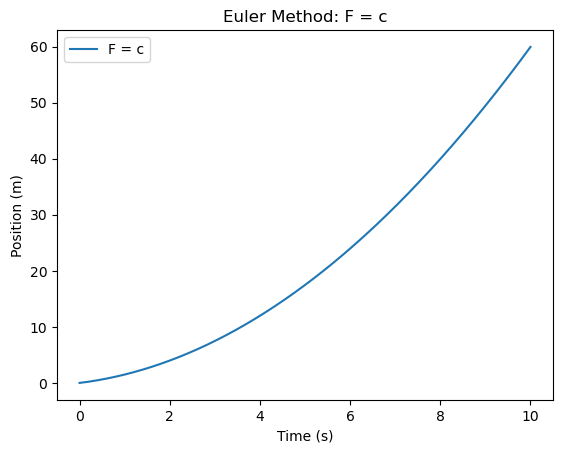

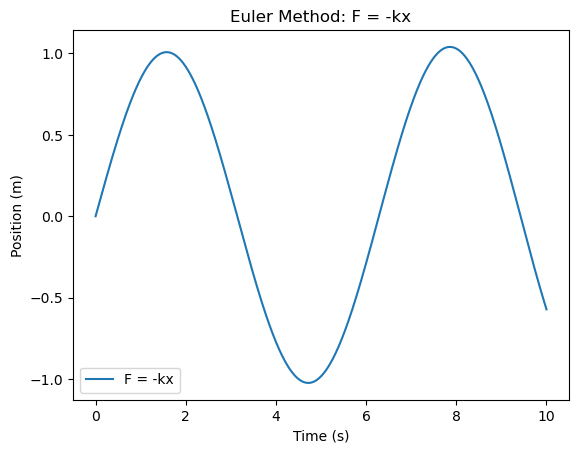

In [24]:
# case 1: F = 0
t1, x1, v1 = euler_solver(x0, v0, t0, tf, dt, force_func, m)
graph1 = sns.lineplot(x=t1, y=x1, label='F = 0')
graph1.set_title('Euler Method: F = 0')
graph1.set_xlabel('Time (s)')
graph1.set_ylabel('Position (m)')
plt.legend()
plt.show()

# case 2: F = c
t2, x2, v2 = euler_solver(x0, v0, t0, tf, dt, force_constant, m)
graph2 = sns.lineplot(x=t2, y=x2, label='F = c')
graph2.set_title('Euler Method: F = c')
graph2.set_xlabel('Time (s)')
graph2.set_ylabel('Position (m)')
plt.legend()
plt.show()

# case 3: F = -kx
t3, x3, v3 = euler_solver(x0, v0, t0, tf, dt, force_spring, m)
graph3 = sns.lineplot(x=t3, y=x3, label='F = -kx')
graph3.set_title('Euler Method: F = -kx')
graph3.set_xlabel('Time (s)')
graph3.set_ylabel('Position (m)')
plt.legend()
plt.show()




    